In [20]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [21]:
df = pd.read_csv('/Users/harmonyedgley/Downloads/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
df.shape

(891, 12)

In [23]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Identify the Target
The target variable for this classification task is Survived, which indicates whether a passenger survived the Titanic disaster.

### Seperate target (y) and features (X)
- y -> Survived
- X -> Everything else 

### Check for missing values (NaNs)
- I examine feature quality. This is important because it will help me identify which features and targets have missing values & data types. Allowing me to make accurate cleaning decisions.

In [24]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Cleaning & Feature Seleection
- Fill missing age values with median to preserve sample size
- Fill missing embarked values with the mode since there are very few missing values
- Drop the cabin feature due to extensive missing values and complexity not suitable for a baseline model
- Drop Name, Ticket, Passenger ID since they are not directly linked to survival likelihood and not needed for baseline models.
- Target (y) is the Survived column and Features (X) are Pclass, Sex, Age, SibSp, Parch, Fare, Embarked

In [25]:
# Fill missing Age values with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Embarked values with mode since there are only 2 missing values
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop the Cabin, Name, Ticket, and Passenger ID feature
df = df.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'])

In [27]:
# Encode Categorical Variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

### Define features (X) and target (y)

In [29]:
features = ['Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q']
X = df.loc[:, features]
y = df.loc[:, 'Survived']

### Train/Test Split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

### Train Logistic Regression Model

In [32]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train) 

LogisticRegression(max_iter=1000)

### Make Predictions

In [33]:
y_pred_log = log_model.predict(X_test)

### Evaluate Accuracy

In [36]:
accuracy_log = accuracy_score(y_test, y_pred_log)
accuracy_log

0.6815642458100558

### Create and Train Random Forest Classifier Model

In [37]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Make Predictions

In [38]:
y_pred_rf = rf_model.predict(X_test)

### Evaluate Accuracy

In [40]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf

0.7374301675977654

### Visualization - Confusion Matrix

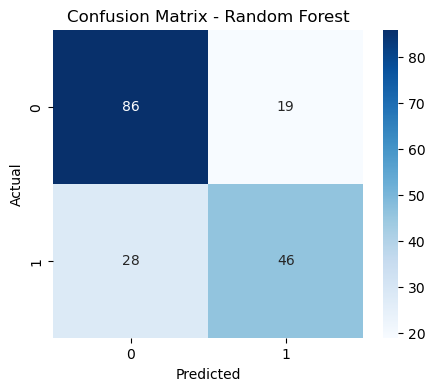

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

The confusion matrix shows that the model correctly classifies most passengers, with some misclassifications between survivors and non-survivors. This highlights areas where accuracy alone may hide class-specific errors.